In [1]:
'''import numpy as np
import pandas as pd
import math
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('HW3.csv')
df_norm = (df - df.mean()) / (df.max() - df.min())
#print(df_norm.head(10))
#df_norm.shape

#/////////////////////////////////////////////////////////////////////////////////////////////////////////////
node1 = -0.4
node2 = 0.2
node3 = 0.1

w14 = 0.2
w15 = -0.3
w24 = 0.4
w25 = 0.1
w34 = -0.5
w35 = 0.2
w46 = -0.3
w56 = -0.2

thershold = 0.003
target_value = 1
learning_rate = 0.9

output_lists = []
error_list = []
weight_list=[]
bias_list=[]

#Activation Function
def Activate(III):
    II = math.exp(-1 * III)
    return 1 / (1 + II)



def Feed_Forward(inp1,inp2,inp3):
    #I4
    global I4
    I4=inp1*w14+inp2*w24+inp3*w34+node1
    global O4
    O4 = Activate(I4)
    #print("O4 = ",O4)

    #I5
    global I5
    I5 = inp1 * w15 + inp2*w25 + inp3*w35 + node2
    global O5
    O5 = Activate(I5)
    #print("O5 = ",O5)

    #I6
    global I6
    I6 = O4 * w46 + O5*w56+ node3
    global O6
    O6 = Activate(I6)
    output_lists.append(O6)
    print("O6 = ",O6)
    
#Last Node Error Function
def Last_Error(output):
    return output*(1-output)*(target_value-output)
#Internal Error Function
def Internal_Error(node_ouput,summision_error,node_weight):
    return node_ouput*(1-node_ouput)*(summision_error*node_weight)

def Calculate_Errors(O6,O5,w56,O4,w46):
    global Err6
    Err6 = Last_Error(O6)
    error_list.append(Err6)
    print("Err6= ",Err6)

    global Err5
    Err5 = Internal_Error(O5,Err6,w56)
    #print("Err5= ",Err5)

    global Err4
    Err4 = Internal_Error(O4,Err6,w46)
    #print("Err4= ",Err4)

        
#ErrorCheck
def Error_Check(FinalError):
    FinalError = np.abs(FinalError)
    if FinalError > thershold:
        return True
    elif FinalError <= thershold:
        return False

#UpdateWeight
def Update_Weight(node_error,previous_output,weight_node):
    weight_list.append(weight_node)
    diff=learning_rate*node_error*previous_output
    weight = weight_node+diff
    return weight

#UpdateBias
def Update_Biases(bias,error):
    bias_list.append(bias)
    b_diff = learning_rate*error
    bias = bias+b_diff
    return bias


#Back Propagate
def Back_Propogation(inp1,inp2,inp3):
    global w46
    w46 = Update_Weight(Err6,O4,w46)
    #print("w46=",w46)
    global node1
    node1 = Update_Biases(node1,Err4)
    #print("bias4=",node1)
    global w56
    w56 = Update_Weight(Err6,O5,w56)
    #print("w56=",w56)
    global node2
    node2 = Update_Biases(node2,Err5)
    #print("bias5=",node2)
    global node3
    node3 = Update_Biases(node3,Err6)
    #print("bias6=",node3)
    global w14
    w14 = Update_Weight(Err4,inp1,w14)
    #print("w14=",w14)
    global w15
    w15 = Update_Weight(Err5,inp1,w15)
    #print("w15=",w15)
    global w24
    w24 = Update_Weight(Err4,inp2,w24)
    #print("w24=",w24)
    global w25
    w25 = Update_Weight(Err5,inp2,w25)
    #print("w25=",w25)
    global w34
    w34=Update_Weight(Err4,inp3,w34)
    #print("w34=",w34)
    global w35
    w35=Update_Weight(Err5,inp3,w35)
   # print("w35=",w35)
    

#/////////////////////////////////////////////////////////////////////////////////////////////////////////
y_output=[]
for index in range(705):
    input1,input2,input3,y_outputs = df_norm.loc[index,['X1','X2','X3','Y']]
    global inp1 
    inp1= input1
    global inp2
    inp2=input2
    global inp3
    inp3=input3
    y_output.append(y_outputs)
    
    cond = True
    count = 0
    for i in range(1):
        while cond:
            print(index)
            count+=1
            Feed_Forward(inp1,inp2,inp3)
            Calculate_Errors(O6,O5,w56,O4,w46)
            if (Error_Check(Err6)) == False:
                cond=False
                break
            else:
                Back_Propogation(inp1,inp2,inp3)

        print("Internal",count)
    
    
    
#/////////////////////////////////////////////////////////////////////////////////////////////////////////////////
final_y_s = []
for j in range(len(y_output)):
    final_y_s.append(Activate(y_output[j]))
    

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot(np.array(output_lists),label="Outputs")
ax.plot(np.array(error_list),label="Errors")
ax.plot(np.array(final_y_s),label="Csv results")
ax.legend()
plt.show()


         X1        X2        X3         Y
0 -0.442764 -0.452847 -0.426812 -0.436738
1 -0.435462 -0.441477 -0.451609 -0.432199
2 -0.430923 -0.434175 -0.440239 -0.430165
3 -0.428889 -0.429636 -0.432937 -0.442908
4 -0.441632 -0.427602 -0.428398 -0.441089


'\n#/////////////////////////////////////////////////////////////////////////////////////////////////////////////\nnode1 = -0.4\nnode2 = 0.2\nnode3 = 0.1\n\nw14 = 0.2\nw15 = -0.3\nw24 = 0.4\nw25 = 0.1\nw34 = -0.5\nw35 = 0.2\nw46 = -0.3\nw56 = -0.2\n\nthershold = 0.003\ntarget_value = 1\nlearning_rate = 0.9\n\noutput_lists = []\nerror_list = []\nweight_list=[]\nbias_list=[]\n\n#Activation Function\ndef Activate(III):\n    II = math.exp(-1 * III)\n    return 1 / (1 + II)\n\n\n\ndef Feed_Forward(inp1,inp2,inp3):\n    #I4\n    global I4\n    I4=inp1*w14+inp2*w24+inp3*w34+node1\n    global O4\n    O4 = Activate(I4)\n    #print("O4 = ",O4)\n\n    #I5\n    global I5\n    I5 = inp1 * w15 + inp2*w25 + inp3*w35 + node2\n    global O5\n    O5 = Activate(I5)\n    #print("O5 = ",O5)\n\n    #I6\n    global I6\n    I6 = O4 * w46 + O5*w56+ node3\n    global O6\n    O6 = Activate(I6)\n    output_lists.append(O6)\n    #print("O6 = ",O6)\n    \n#Last Node Error Function\ndef Last_Error(output):\n    retu

In [39]:
import numpy as np
import pandas as pd
import math
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('HW3.csv')
df_norm = (df - df.mean()) / (df.max() - df.min())

y_output=[]
for index in range(705):
    y_outputs = df_norm.loc[index,'Y']
    y_output.append(y_outputs)

final_y_s = []
for j in range(len(y_output)):
    final_y_s.append(Activate(y_output[j]))
    
output_lists = []
error_list = []
weight_list=[]
bias_list=[]
thershold = 0.003
#Activation Function
def Activate(III):
    II = math.exp(-1 * III)
    return 1 / (1 + II)

def Feed_Forward(inp1,inp2,inp3,w14,w15,w24,w25,w34,w35,node1,node2,node3):
    #I4
    global I4
    I4=inp1*w14+inp2*w24+inp3*w34+node1
    global O4
    O4 = Activate(I4)
    #print("O4 = ",O4)

    #I5
    global I5
    I5 = inp1 * w15 + inp2*w25 + inp3*w35 + node2
    global O5
    O5 = Activate(I5)
    #print("O5 = ",O5)

    #I6
    global I6
    I6 = O4 * w46 + O5*w56+ node3
    global O6
    O6 = Activate(I6)
    #output_lists.append(O6)
    print("O6 = ",O6)
    
    
    
    
#Last Node Error Function
def Last_Error(output):
    return output*(1-output)*(target_value-output)
#Internal Error Function
def Internal_Error(node_ouput,summision_error,node_weight):
    return node_ouput*(1-node_ouput)*(summision_error*node_weight)

def Calculate_Errors(O6,O5,w56,O4,w46):
    global Err6
    Err6 = Last_Error(O6)
    error_list.append(Err6)
    print("Err6= ",Err6)

    global Err5
    Err5 = Internal_Error(O5,Err6,w56)
    #print("Err5= ",Err5)

    global Err4
    Err4 = Internal_Error(O4,Err6,w46)
    #print("Err4= ",Err4)

        
#ErrorCheck
def Error_Check(FinalError):
    FinalError = np.abs(FinalError)
    if FinalError > thershold:
        return True
    elif FinalError <= thershold:
        return False

#UpdateWeight
def Update_Weight(node_error,previous_output,weight_node):
    weight_list.append(weight_node)
    diff=learning_rate*node_error*previous_output
    weight = weight_node+diff
    return weight

#UpdateBias
def Update_Biases(bias,error):
    bias_list.append(bias)
    b_diff = learning_rate*error
    bias = bias+b_diff
    return bias


#Back Propagate
def Back_Propogation(para_inp1,para_inp2,para_inp3,para_w14,para_w15,para_w24,para_w25,para_w34,para_w35,para_w46,para_w56,para_node1,para_node2,para_node3):
    global w46
    w46 = Update_Weight(Err6,O4,para_w46)
    #print("w46=",w46)
    global node1
    node1 = Update_Biases(para_node1,Err4)
    #print("bias4=",node1)
    global w56
    w56 = Update_Weight(Err6,O5,para_w56)
    #print("w56=",w56)
    global node2
    node2 = Update_Biases(para_node2,Err5)
    #print("bias5=",node2)
    global node3
    node3 = Update_Biases(para_node3,Err6)
    #print("bias6=",node3)
    global w14
    w14 = Update_Weight(Err4,para_inp1,para_w14)
    #print("w14=",w14)
    global w15
    w15 = Update_Weight(Err5,para_inp1,para_w15)
    #print("w15=",w15)
    global w24
    w24 = Update_Weight(Err4,para_inp2,para_w24)
    #print("w24=",w24)
    global w25
    w25 = Update_Weight(Err5,para_inp2,para_w25)
    #print("w25=",w25)
    global w34
    w34=Update_Weight(Err4,para_inp3,para_w34)
    #print("w34=",w34)
    global w35
    w35=Update_Weight(Err5,para_inp3,para_w35)
   # print("w35=",w35)

for index in range(705):
    input1,input2,input3 = df_norm.loc[index,['X1','X2','X3']]
    global inp1 
    inp1= input1
    global inp2
    inp2=input2
    global inp3
    inp3=input3
    node1 = -0.4
    node2 = 0.2
    node3 = 0.1

    w14 = 0.2
    w15 = -0.3
    w24 = 0.4
    w25 = 0.1
    w34 = -0.5
    w35 = 0.2
    w46 = -0.3
    w56 = -0.2

    
    target_value = final_y_s[index]
    print("target->",target_value)
    learning_rate = 0.9
    
    cond = True
    #count = 0
    while cond:
        count+=1
        Feed_Forward(inp1,inp2,inp3,w14,w15,w24,w25,w34,w35,node1,node2,node3)
        Calculate_Errors(O6,O5,w56,O4,w46)
        if (Error_Check(Err6)) == False:
            output_lists.append(O6)
            cond = False
            break
        else:
            Back_Propogation(inp1,inp2,inp3,w14,w15,w24,w25,w34,w35,w46,w56,node1,node2,node3)
    #print(count)
    #print(output_lists)
    #print(len(output_lists))
  

target-> 0.3925184372737418
O6 =  0.468433282830821
Err6=  -0.01890306546196865
O6 =  0.4622297588211217
Err6=  -0.017328380834651904
O6 =  0.45654766915885847
Err6=  -0.015886414054855302
O6 =  0.4513434803875558
Err6=  -0.014566995024194063
O6 =  0.4465766667178335
Err6=  -0.013360272334025397
O6 =  0.442209747963868
Err6=  -0.01225687294478384
O6 =  0.4382082301022219
Err6=  -0.011247994397176848
O6 =  0.43454048282479724
Err6=  -0.010325449091385335
O6 =  0.43117757912390564
Err6=  -0.009481675446904219
O6 =  0.42809311472971906
Err6=  -0.008709726931430085
O6 =  0.4252630197726475
Err6=  -0.008003246953816134
O6 =  0.4226653710131347
Err6=  -0.007356435331121747
O6 =  0.4202802100525683
Err6=  -0.006764010329581888
O6 =  0.4180893708463317
Err6=  -0.00622116902010642
O6 =  0.41607631837081804
Err6=  -0.005723547775085042
O6 =  0.4142259992849965
Err6=  -0.005267184079130901
O6 =  0.41252470474785924
Err6=  -0.004848480364684202
O6 =  0.4109599451114388
Err6=  -0.004464170262542045

target-> 0.3825210687235773
O6 =  0.4683125635582233
Err6=  -0.021361731015339863
O6 =  0.4612961070154509
Err6=  -0.019575755248416645
O6 =  0.454872077163234
Err6=  -0.017940407152691913
O6 =  0.4489912375533159
Err6=  -0.016444593884191224
O6 =  0.4436074806342189
Err6=  -0.015077341087074387
O6 =  0.43867800198515167
Err6=  -0.013828061488857919
O6 =  0.43416331999009466
Err6=  -0.012686721108616404
O6 =  0.4300271923469323
Err6=  -0.011643931717376464
O6 =  0.4262364673124641
Err6=  -0.010690991595021217
O6 =  0.42276089695162694
Err6=  -0.009819891109224875
O6 =  0.4195729315349911
Err6=  -0.009023295233916493
O6 =  0.4166475081688975
Err6=  -0.008294511717436961
O6 =  0.4139618423133301
Err6=  -0.007627451040554131
O6 =  0.41149522766353575
Err6=  -0.007016582403397201
O6 =  0.40922884762990097
Err6=  -0.006456888596904499
O6 =  0.40714560009987394
Err6=  -0.005943821622341915
O6 =  0.4052299361164032
Err6=  -0.00547326022122186
O6 =  0.40346771241709456
Err6=  -0.00504146998972

O6 =  0.4078747470920498
Err6=  -0.0034167838578530677
O6 =  0.40677342662436156
Err6=  -0.003148137593946106
O6 =  0.4057592905480721
Err6=  -0.0029011301442880104
target-> 0.39474204978078375
O6 =  0.4682256052511916
Err6=  -0.01829669897631753
O6 =  0.46221477825486496
Err6=  -0.016771849753397412
O6 =  0.4567093278878399
Err6=  -0.015375687748184964
O6 =  0.45166695128832884
Err6=  -0.01409824404817012
O6 =  0.44704832876189243
Err6=  -0.012929909242605517
O6 =  0.4428171340036649
Err6=  -0.011861571291458662
O6 =  0.43893995826711774
Err6=  -0.010884692791052093
O6 =  0.4353861795395421
Err6=  -0.0099913454010823
O6 =  0.4321277992548358
Err6=  -0.00917421484278235
O6 =  0.42913926251230566
Err6=  -0.008426586380800809
O6 =  0.426397272836384
Err6=  -0.007742317978956603
O6 =  0.42388060887317075
Err6=  -0.00711580624984963
O6 =  0.42156994778187246
Err6=  -0.006541948773211644
O6 =  0.41944769819898836
Err6=  -0.006016105222672218
O6 =  0.41749784433649473
Err6=  -0.0055340589182

target-> 0.38889294374979966
O6 =  0.4682916943715389
Err6=  -0.01976985882990177
O6 =  0.4617985117933429
Err6=  -0.018119997000323133
O6 =  0.45585237732841727
Err6=  -0.01660935361575429
O6 =  0.4504076287817617
Err6=  -0.01522738183966727
O6 =  0.4454216822799695
Err6=  -0.013963797235185808
O6 =  0.44085511126212834
Err6=  -0.012808772091664734
O6 =  0.4366716096176521
Err6=  -0.011753050842822254
O6 =  0.4328378789982257
Err6=  -0.010788009173573953
O6 =  0.4293234695696166
Err6=  -0.009905674026306672
O6 =  0.4261005951011712
Err6=  -0.009098717312827525
O6 =  0.4231439369529645
Err6=  -0.008360432669956865
O6 =  0.4204304468218128
Err6=  -0.0076847019398074146
O6 =  0.41793915468784676
Err6=  -0.007065956063204349
O6 =  0.4156509859576087
Err6=  -0.006499133606059173
O6 =  0.4135485900809413
Err6=  -0.00597963907224655
O6 =  0.41161618173449854
Err6=  -0.005503302393207196
O6 =  0.40983939486748344
Err6=  -0.005066340445714416
O6 =  0.408205149385019
Err6=  -0.00466532107475777

O6 =  0.4416345805599817
Err6=  -0.012420957301755
O6 =  0.43757514435796546
Err6=  -0.011397218782499082
O6 =  0.4338548557156926
Err6=  -0.010461272316220915
O6 =  0.43044425253733737
Err6=  -0.00960541023263734
O6 =  0.4273164476708195
Err6=  -0.008822551903779258
O6 =  0.4244469370820947
Err6=  -0.008106218850902252
O6 =  0.4218134081619979
Err6=  -0.007450500887781833
O6 =  0.41939555389216354
Err6=  -0.006850017515785492
O6 =  0.41717489639080907
Err6=  -0.006299877458961334
O6 =  0.41513462181106964
Err6=  -0.005795638264659879
O6 =  0.4132594274993461
Err6=  -0.005333267206446822
O6 =  0.4115353816057293
Err6=  -0.004909104240220344
O6 =  0.40994979487338684
Err6=  -0.00451982742703547
O6 =  0.4084911040453121
Err6=  -0.004162421006125284
O6 =  0.4071487661613514
Err6=  -0.003834146148502016
O6 =  0.40591316293714197
Err6=  -0.003532514322911722
O6 =  0.40477551439173043
Err6=  -0.0032552631454871193
O6 =  0.40372780090251453
Err6=  -0.0030003345504101436
O6 =  0.40276269290092

target-> 0.3894190553550706
O6 =  0.4683160679107649
Err6=  -0.019645050672431007
O6 =  0.46186412026694185
Err6=  -0.01800590608663777
O6 =  0.4559556281081033
Err6=  -0.016505068445288814
O6 =  0.4505452190970224
Err6=  -0.01513204007071344
O6 =  0.4455905919959325
Err6=  -0.013876594859899682
O6 =  0.44105258921845825
Err6=  -0.01272896740499809
O6 =  0.4368951562745562
Err6=  -0.011679964889472316
O6 =  0.4330852273132527
Err6=  -0.010721023914216646
O6 =  0.4295925654094253
Err6=  -0.009844229114534404
O6 =  0.42638957803833294
Err6=  -0.009042306107295128
O6 =  0.42345112197284906
Err6=  -0.008308597907973772
O6 =  0.42075430723725
Err6=  -0.007637031354549955
O6 =  0.41827830640399183
Err6=  -0.007022078124058351
O6 =  0.4160041731263371
Err6=  -0.006458713489792851
O6 =  0.4139146721180602
Err6=  -0.00594237492345511
O6 =  0.4119941216329216
Err6=  -0.005468921899430338
O6 =  0.4102282487171298
Err6=  -0.005034597731079746
O6 =  0.40860405699975094
Err6=  -0.004635993902487094


O6 =  0.391569405068505
Err6=  -0.0032723461422978803
O6 =  0.39052390565226974
Err6=  -0.0030203724112393845
O6 =  0.389559552967761
Err6=  -0.002788355313997809
target-> 0.375670409458246
O6 =  0.4683272089596669
Err6=  -0.023071249752938512
O6 =  0.4607445285572036
Err6=  -0.021137431234551356
O6 =  0.45380424899354177
Err6=  -0.0193667185658482
O6 =  0.44745317525053846
Err6=  -0.01774748711541779
O6 =  0.4416412622663129
Err6=  -0.016268033480028973
O6 =  0.4363219144934168
Err6=  -0.014916940557527753
O6 =  0.4314520807213183
Err6=  -0.013683309937304131
O6 =  0.4269922102657044
Err6=  -0.012556897953901438
O6 =  0.4229061196505762
Err6=  -0.011528183692272714
O6 =  0.41916080534050204
Err6=  -0.010588390303633111
O6 =  0.4157262276216194
Err6=  -0.009729475367976446
O6 =  0.4125750828873626
Err6=  -0.008944101652441291
O6 =  0.40968257583402107
Err6=  -0.008225596288260601
O6 =  0.40702619893552355
Err6=  -0.007567903921433367
O6 =  0.4045855236467953
Err6=  -0.00696553759433402

O6 =  0.4106985755253448
Err6=  -0.004976850112888379
O6 =  0.4090912230003498
Err6=  -0.004582339387825067
O6 =  0.4076124885939147
Err6=  -0.004220139495766176
O6 =  0.40625167930931616
Err6=  -0.003887470074128201
O6 =  0.40499904151554766
Err6=  -0.0035818054244445047
O6 =  0.40384567299063434
Err6=  -0.003300849877642982
O6 =  0.4027834435673543
Err6=  -0.0030425155304775117
O6 =  0.4018049235779811
Err6=  -0.0028049021712285177
target-> 0.39105795521841324
O6 =  0.46827233456661294
Err6=  -0.019225867387157047
O6 =  0.46195724216021494
Err6=  -0.01762221264145931
O6 =  0.4561737120378164
Err6=  -0.016153868537115056
O6 =  0.45087734287102343
Err6=  -0.014810500610543658
O6 =  0.44602677609382985
Err6=  -0.013582075057604025
O6 =  0.4415837482761673
Err6=  -0.012459031094194392
O6 =  0.43751303924614227
Err6=  -0.011432381544459955
O6 =  0.43378235247669783
Err6=  -0.010493762366819658
O6 =  0.4303621543680149
Err6=  -0.00963544684283069
O6 =  0.4272254913993606
Err6=  -0.00885033

Err6=  -0.006830097293785821
O6 =  0.41727271043006375
Err6=  -0.006281482974451148
O6 =  0.4152381090414726
Err6=  -0.0057786471319050845
O6 =  0.41336816244186303
Err6=  -0.005317567215597784
O6 =  0.4116489714470059
Err6=  -0.004894592557742378
O6 =  0.41006787700017816
Err6=  -0.004506409830123025
O6 =  0.4086133437244284
Err6=  -0.004150011160306829
O6 =  0.4072748543711478
Err6=  -0.0038226649332607724
O6 =  0.406042814350904
Err6=  -0.003521889207118684
O6 =  0.4049084655094866
Err6=  -0.0032454276123986083
O6 =  0.4038638083253237
Err6=  -0.002991227570647455
target-> 0.39092281765485537
O6 =  0.468313786948947
Err6=  -0.019270040544549213
O6 =  0.46198469578443074
Err6=  -0.01766277351021177
O6 =  0.45618846831845555
Err6=  -0.016191138492613506
O6 =  0.4508805744337614
Err6=  -0.01484477803762763
O6 =  0.446019535838072
Err6=  -0.013613633741495287
O6 =  0.4415669795986748
Err6=  -0.012488120154239548
O6 =  0.43748758655844866
Err6=  -0.01145922633656369
O6 =  0.4337489714642

O6 =  0.4244374544689553
Err6=  -0.007020987900741443
O6 =  0.4221569487528285
Err6=  -0.006454625698690539
O6 =  0.4200623969387858
Err6=  -0.005935627532270122
O6 =  0.4181380050765573
Err6=  -0.005459839141413091
O6 =  0.4163693886160007
Err6=  -0.005023486577502464
O6 =  0.4147434423948914
Err6=  -0.004623141867694663
O6 =  0.41324822194658645
Err6=  -0.0042556910578370665
O6 =  0.41187283554961845
Err6=  -0.003918304754233243
O6 =  0.41060734631483015
Err6=  -0.003608411161114057
O6 =  0.40944268354772007
Err6=  -0.0033236715318283095
O6 =  0.4083705626115
Err6=  -0.0030619579041318017
O6 =  0.4073834125338213
Err6=  -0.0028213329638821327
target-> 0.39588562397053706
O6 =  0.46817445063930974
Err6=  -0.017998987801966387
O6 =  0.4622604155350085
Err6=  -0.016499161852850334
O6 =  0.45684351474158635
Err6=  -0.015125939705041096
O6 =  0.4518820999173813
Err6=  -0.013869468536796983
O6 =  0.4473374864607103
Err6=  -0.012720272097128603
O6 =  0.44317395129674425
Err6=  -0.0116693783

O6 =  0.44083035728831116
Err6=  -0.010181027758175143
O6 =  0.4375048676843238
Err6=  -0.009345932737123485
O6 =  0.434455313763495
Err6=  -0.008581816788041102
O6 =  0.43165793624256926
Err6=  -0.007882456494852549
O6 =  0.42909106718640355
Err6=  -0.0072421610928987065
O6 =  0.4267349583336616
Err6=  -0.006655738600673986
O6 =  0.42457161698893237
Err6=  -0.006118459626924474
O6 =  0.42258465159739084
Err6=  -0.005626020757630145
O6 =  0.420759128078334
Err6=  -0.005174508772761181
O6 =  0.419081437284221
Err6=  -0.0047603664757990966
O6 =  0.4175391734807401
Err6=  -0.004380360590774708
O6 =  0.4161210234426532
Err6=  -0.004031551954625186
O6 =  0.414816665579457
Err6=  -0.0037112680789764072
O6 =  0.41361667840751176
Err6=  -0.0034170780542028094
O6 =  0.41251245764470434
Err6=  -0.003146769704520055
O6 =  0.41149614120090244
Err6=  -0.0028983288647780343
target-> 0.4009268978397936
O6 =  0.46818073929170484
Err6=  -0.016745368178717347
O6 =  0.4626798077628809
Err6=  -0.015352218

Err6=  -0.007354781279233537
O6 =  0.4414502935345765
Err6=  -0.006753484722777262
O6 =  0.43924323933767195
Err6=  -0.0062026561658694674
O6 =  0.43721760647142643
Err6=  -0.005697930459173763
O6 =  0.43535804691364133
Err6=  -0.005235323809282664
O6 =  0.43365055235881655
Err6=  -0.004811203489608042
O6 =  0.43208233662256573
Err6=  -0.004422258617189989
O6 =  0.4306417271918061
Err6=  -0.004065472451245959
O6 =  0.4293180657042091
Err6=  -0.0037380964665954235
O6 =  0.4281016169592286
Err6=  -0.0034376263147066805
O6 =  0.42698348595673946
Err6=  -0.0031617796900107846
O6 =  0.42595554240522
Err6=  -0.0029084760566307445
target-> 0.41557486486720085
O6 =  0.4680886111662658
Err6=  -0.013074959897696768
O6 =  0.4637927159868299
Err6=  -0.01199125074823868
O6 =  0.4598552878685772
Err6=  -0.010998743513087512
O6 =  0.4562461707379478
Err6=  -0.010089965418351925
O6 =  0.45293759018182156
Err6=  -0.009257927733623918
O6 =  0.44990403541833673
Err6=  -0.008496139956812821
O6 =  0.447122

O6 =  0.4551969905290611
Err6=  -0.004714800610194081
O6 =  0.45364992426166817
Err6=  -0.00432867660254723
O6 =  0.45223005660811844
Err6=  -0.003974615822310177
O6 =  0.4509267658486532
Err6=  -0.00364990658762925
O6 =  0.44973033367735904
Err6=  -0.0033520698296293293
O6 =  0.4486318678275197
Err6=  -0.0030788396102794592
O6 =  0.44762323095242235
Err6=  -0.0028281449737182123
target-> 0.4400472629308231
O6 =  0.46798107596705246
Err6=  -0.00695481519279913
O6 =  0.46569640836084414
Err6=  -0.006382104074465641
O6 =  0.4636005621806993
Err6=  -0.005857118597047596
O6 =  0.46167775453185667
Err6=  -0.005375856479310126
O6 =  0.4599135202720438
Err6=  -0.004934640732702156
O6 =  0.4582946088583502
Err6=  -0.004530098149597698
O6 =  0.4568088866171409
Err6=  -0.004159137577304443
O6 =  0.4554452450212626
Err6=  -0.0038189285850702844
O6 =  0.4541935152184552
Err6=  -0.0035068809237059273
O6 =  0.4530443888186454
Err6=  -0.003220625026404279
O6 =  0.45198934478843905
Err6=  -0.002957993

target-> 0.5320330067670342
O6 =  0.46734788482433137
Err6=  0.016102315755608294
O6 =  0.4726541808140251
Err6=  0.014800303368752966
O6 =  0.4775343124054598
Err6=  0.013597167711367916
O6 =  0.4820194145419398
Err6=  0.01248722858921675
O6 =  0.48613922564126677
Err6=  0.011464628119297306
O6 =  0.4899218995322253
Err6=  0.010523499663170873
O6 =  0.49339390421123647
Err6=  0.009658089409133682
O6 =  0.4965799852497899
Err6=  0.008862840703013295
O6 =  0.4995031761054338
Err6=  0.008132449635932463
O6 =  0.5021848414197201
Err6=  0.007461898855655238
O6 =  0.5046447425870054
Err6=  0.0068464751806281195
O6 =  0.5069011174812736
Err6=  0.0062817754045949355
O6 =  0.5089707683017999
Err6=  0.005763703689957508
O6 =  0.5108691531223513
Err6=  0.005288463145467108
O6 =  0.5126104779819675
Err6=  0.004852543545039976
O6 =  0.5142077873102794
Err6=  0.004452706643637876
O6 =  0.515673051199018
Err6=  0.004085970158344152
O6 =  0.5170172485657217
Err6=  0.0037495911857306306
O6 =  0.518250

Err6=  -0.004411871275360606
O6 =  0.46506495636528283
Err6=  -0.004049169446371459
O6 =  0.46373368776761636
Err6=  -0.0037165604574620746
O6 =  0.4625120474768396
Err6=  -0.0034115206626499327
O6 =  0.4613909175298458
Err6=  -0.003131738608424833
O6 =  0.4603619466371099
Err6=  -0.0028750979333696048
target-> 0.4514527075854587
O6 =  0.46814147553843755
Err6=  -0.004155253463185348
O6 =  0.4667777177929409
Err6=  -0.0038143380310672824
O6 =  0.46552609453737914
Err6=  -0.0035016212190356793
O6 =  0.4643773049112372
Err6=  -0.0032147483223890837
O6 =  0.4633228258799726
Err6=  -0.002951561711242924
target-> 0.4618689709138536
O6 =  0.467667202526702
Err6=  -0.0014434963751051456
target-> 0.4525581776345287
O6 =  0.4677433824851535
Err6=  -0.0037805011683747177
O6 =  0.46650111572906366
Err6=  -0.0034700881036280537
O6 =  0.4653610592066869
Err6=  -0.003185358775960456
O6 =  0.4643147328896421
Err6=  -0.0029241675661728236
target-> 0.44310431858699134
O6 =  0.4674562330854371
Err6=  -0

O6 =  0.4394494861827476
Err6=  -0.003088724819371037
O6 =  0.4384401162997788
Err6=  -0.00283866201363622
target-> 0.4349264200874176
O6 =  0.46817655395878205
Err6=  -0.008278860002643884
O6 =  0.4654554660491192
Err6=  -0.007595830421968756
O6 =  0.4629598703685093
Err6=  -0.006969901483763229
O6 =  0.4606708603952379
Err6=  -0.00639628906011473
O6 =  0.45857109992747597
Err6=  -0.005870587324838283
O6 =  0.4566447062776416
Err6=  -0.005388748086928222
O6 =  0.4548771372506861
Err6=  -0.004947058179403813
O6 =  0.45325508345810117
Err6=  -0.004542116114533939
O6 =  0.45176636687497357
Err6=  -0.004170808840829692
O6 =  0.45039984608830785
Err6=  -0.0038302891602629593
O6 =  0.4491453283641288
Err6=  -0.003517954162331301
O6 =  0.4479934884424395
Err6=  -0.0032314248863248066
O6 =  0.4469357938254754
Err6=  -0.0029685273201261087
target-> 0.4399818487827105
O6 =  0.46816319714728993
Err6=  -0.007016772983259202
O6 =  0.46586087787588093
Err6=  -0.0064395957912793496
O6 =  0.463748625

target-> 0.4436745978829832
O6 =  0.4679252061533037
Err6=  -0.00603770322608877
O6 =  0.46593944860067976
Err6=  -0.005540382754946105
O6 =  0.46411780436023997
Err6=  -0.005084480337529507
O6 =  0.46244655903367615
Err6=  -0.004666516924312766
O6 =  0.4609131487102361
Err6=  -0.004283300960122963
O6 =  0.4595060671285514
Err6=  -0.003931907523555539
O6 =  0.4582147787351886
Err6=  -0.003609657988709744
O6 =  0.45702963778772837
Err6=  -0.003314100535661426
O6 =  0.45594181345281926
Err6=  -0.003042991708334275
O6 =  0.4549432207176923
Err6=  -0.002794279126919677
target-> 0.4496986989782933
O6 =  0.4679442229825617
Err6=  -0.004542632396145256
O6 =  0.46645035048655786
Err6=  -0.004169057570206699
O6 =  0.4650796292584751
Err6=  -0.0038264765669696454
O6 =  0.4638218118521288
Err6=  -0.0035122930226157882
O6 =  0.4626675102196821
Err6=  -0.0032241279862698954
O6 =  0.46160812444280536
Err6=  -0.002959802633900821
target-> 0.44878781606861623
O6 =  0.4679500739918868
Err6=  -0.0047708

Err6=  0.007941559751881986
O6 =  0.4700989833197565
Err6=  0.00729462828815764
O6 =  0.47250449273823075
Err6=  0.006699112580283601
O6 =  0.47471423125689644
Err6=  0.006151225616635971
O6 =  0.4767436890645344
Err6=  0.005647388954089255
O6 =  0.47860723579310027
Err6=  0.005184238778322949
O6 =  0.48031817643289826
Err6=  0.004758626379273696
O6 =  0.4818888109165402
Err6=  0.004367614573128839
O6 =  0.48333049524149263
Err6=  0.0040084712644224
O6 =  0.4846537025650913
Err6=  0.003678661068567019
O6 =  0.4858680831458936
Err6=  0.00337583569676879
O6 =  0.4869825223451129
Err6=  0.00309782363244813
O6 =  0.48800519616182064
Err6=  0.0028426194927273977
target-> 0.5051094521142468
O6 =  0.46750903934052424
Err6=  0.009360409846756861
O6 =  0.47059295826519953
Err6=  0.00859927449223437
O6 =  0.47342723045374513
Err6=  0.007898184215646675
O6 =  0.4760312228119159
Err6=  0.007252851816553325
O6 =  0.47842300739373106
Err6=  0.006659186862529307
O6 =  0.480619396458949
Err6=  0.00611

target-> 0.5086172123362621
O6 =  0.46737640579731593
Err6=  0.010266309089755586
O6 =  0.47076220637786426
Err6=  0.009431391191665597
O6 =  0.4738739869495022
Err6=  0.008662091713440423
O6 =  0.4767328733085503
Err6=  0.007953823877154357
O6 =  0.4793586277653352
Err6=  0.007302180047389698
O6 =  0.48176966992993975
Err6=  0.0067029629568590605
O6 =  0.4839831168956729
Err6=  0.006152204215892718
O6 =  0.48601483661097816
Err6=  0.005646173250297846
O6 =  0.48787950967442856
Err6=  0.005181379166585718
O6 =  0.48959069594956917
Err6=  0.004754567504921521
O6 =  0.49116090331844914
Err6=  0.004362713399485971
O6 =  0.492601656615395
Err6=  0.0040030123110094675
O6 =  0.49392356534275317
Err6=  0.003672869213994951
O6 =  0.4951363892000036
Err6=  0.003369886899102598
O6 =  0.49624910078377704
Err6=  0.0030918538781305118
O6 =  0.49726994506114397
Err6=  0.002836732245327431
target-> 0.5075461008433783
O6 =  0.4673508411118136
Err6=  0.010005968089304162
O6 =  0.47065187052300317
Err6=

O6 =  0.5040851496856974
Err6=  0.0058297284535917
O6 =  0.5060106828577816
Err6=  0.00534796138013366
O6 =  0.5077766566418569
Err6=  0.004906053808182478
O6 =  0.5093963053528091
Err6=  0.004500738666879965
O6 =  0.5108817814278166
Err6=  0.004129003060436594
O6 =  0.5122442372670526
Err6=  0.003788072725767023
O6 =  0.5134939029213436
Err6=  0.0034753962063050047
O6 =  0.5146401592240721
Err6=  0.0031886291757918387
O6 =  0.5156916061923279
Err6=  0.002925619208658263
target-> 0.5257922768678726
O6 =  0.46723535607192423
Err6=  0.014576368062600119
O6 =  0.4720502766148562
Err6=  0.01339351750929753
O6 =  0.47647689999739806
Err6=  0.01230155623271602
O6 =  0.4805441047901385
Err6=  0.011294915144766958
O6 =  0.4842792969040785
Err6=  0.010367985452081745
O6 =  0.48770829731369814
Err6=  0.009515240934125186
O6 =  0.4908552940984609
Err6=  0.008731324064598632
O6 =  0.493742841710095
Err6=  0.00801110398900193
O6 =  0.49639189394067484
Err6=  0.007349712984991858
O6 =  0.49882186008

O6 =  0.4919651475657976
Err6=  0.0115171340394331
O6 =  0.4957732498255073
Err6=  0.010567328161746327
O6 =  0.49926655130167236
Err6=  0.009694737144508496
O6 =  0.5024704868573963
Err6=  0.008893556990965931
O6 =  0.5054086689088945
Err6=  0.008158273853284105
O6 =  0.5081029467463215
Err6=  0.007483693178383681
O6 =  0.5105734863135181
Err6=  0.006864952910273655
O6 =  0.5128388623569624
Err6=  0.006297525256946887
O6 =  0.5149161570097577
Err6=  0.00577721047224638
O6 =  0.516821060543527
Err6=  0.005300125257185353
O6 =  0.5185679712921737
Err6=  0.004862687720257549
O6 =  0.5201700927081176
Err6=  0.004461600320924913
O6 =  0.5216395262225622
Err6=  0.004093831825836078
O6 =  0.5229873591028001
Err6=  0.0037565990083463993
O6 =  0.5242237468765337
Err6=  0.003447348597653953
O6 =  0.5253579901610602
Err6=  0.003163739817319083
O6 =  0.5263986059214825
Err6=  0.002903627730529664
target-> 0.5409647602505024
O6 =  0.467106955698079
Err6=  0.018384540511911285
O6 =  0.4731831367520

O6 =  0.5012203684570641
Err6=  0.012588356221555862
O6 =  0.505383859981681
Err6=  0.011546219464446974
O6 =  0.5092005660681757
Err6=  0.01058979487383128
O6 =  0.5126989879010443
Err6=  0.009712507185904726
O6 =  0.5159055252744034
Err6=  0.008908118370107338
O6 =  0.5188445490779787
Err6=  0.008170763239548394
O6 =  0.5215384985073778
Err6=  0.007494964980524218
O6 =  0.5240079927508651
Err6=  0.006875636488392252
O6 =  0.5262719497504826
Err6=  0.006308071962248601
O6 =  0.5283477068079255
Err6=  0.0057879320760408194
O6 =  0.5302511394394804
Err6=  0.005311225162287289
O6 =  0.5319967760960227
Err6=  0.004874286169930973
O6 =  0.5335979072503346
Err6=  0.00447375464794686
O6 =  0.5350666879927976
Err6=  0.0041065526252551205
O6 =  0.5364142337293107
Err6=  0.0037698629757516545
O6 =  0.5376507088897957
Err6=  0.003461108651212451
O6 =  0.5387854087683452
Err6=  0.0031779330158829195
O6 =  0.5398268347546312
Err6=  0.0029181814103327844
target-> 0.5530336472997499
O6 =  0.46693650

target-> 0.5763793684364478
O6 =  0.46671991913113703
Err6=  0.027293407491853088
O6 =  0.4757733939389405
Err6=  0.02509244511658578
O6 =  0.4841018651941388
Err6=  0.0230460526079331
O6 =  0.49175168183881174
Err6=  0.021151164025697694
O6 =  0.49877012225771683
Err6=  0.019402194152994323
O6 =  0.5052039879151162
Err6=  0.017791917594961345
O6 =  0.5110986242775756
Err6=  0.016312144792848357
O6 =  0.5164972780529199
Err6=  0.014954225075195463
O6 =  0.5214407103217443
Err6=  0.013709409004538972
O6 =  0.525966998467035
Err6=  0.01256910018699515
O6 =  0.5301114732027605
Err6=  0.011525022669945904
O6 =  0.5339067490721452
Err6=  0.010569325445319007
O6 =  0.5373828169761179
Err6=  0.009694641159132735
O6 =  0.5405671755269293
Err6=  0.008894112254418142
O6 =  0.5434849844687054
Err6=  0.008161394558074773
O6 =  0.5461592283321535
Err6=  0.007490645748391103
O6 =  0.5486108821795892
Err6=  0.006876504135070193
O6 =  0.5508590740120642
Err6=  0.006314061653677416
O6 =  0.552921240377

Err6=  0.026667593897854933
O6 =  0.49586868791947
Err6=  0.02447220559170044
O6 =  0.5039809659975416
Err6=  0.022444384034476402
O6 =  0.5114124597940766
Err6=  0.020577207639163667
O6 =  0.5182159260567331
Err6=  0.018861998489067812
O6 =  0.5244420919770094
Err6=  0.01728911130927092
O6 =  0.5301389889840911
Err6=  0.01584850667502513
O6 =  0.535351581577068
Err6=  0.014530152786193915
O6 =  0.540121607849396
Err6=  0.013324295664787749
O6 =  0.5444875667613033
Err6=  0.012221631215566393
O6 =  0.5484848031148102
Err6=  0.011213405937134217
O6 =  0.5521456541570083
Err6=  0.01029146703444094
O6 =  0.5554996319088175
Err6=  0.009448277596291636
O6 =  0.5585736230620185
Err6=  0.008676908411927274
O6 =  0.5613920940503854
Err6=  0.007971014819594061
O6 =  0.5639772931056836
Err6=  0.007324804565025111
O6 =  0.5663494441235767
Err6=  0.006733000848980884
O6 =  0.5685269292879377
Err6=  0.006190803424152909
O6 =  0.5705264588702793
Err6=  0.005693849648119413
O6 =  0.5723632276141805
E

O6 =  0.5246968210404207
Err6=  0.01732874788590018
O6 =  0.53042240299169
Err6=  0.015880722960880115
O6 =  0.5356596901819649
Err6=  0.01455599458185385
O6 =  0.5404509336377752
Err6=  0.013344682755885353
O6 =  0.5448350859277485
Err6=  0.012237367472118477
O6 =  0.548847890471359
Err6=  0.011225190546403169
O6 =  0.5525220332107724
Err6=  0.010299905887691682
O6 =  0.5558873302031107
Err6=  0.009453894235760735
O6 =  0.55897093264502
Err6=  0.008680154206825117
O6 =  0.5617975367469009
Err6=  0.007972278213129916
O6 =  0.5643895901732713
Err6=  0.007324419344773933
O6 =  0.5667674898401901
Err6=  0.006731253460113156
O6 =  0.568949768020994
Err6=  0.006187939383339758
O6 =  0.5709532652010587
Err6=  0.00569007913530774
O6 =  0.5727932891264885
Err6=  0.00523367943115032
O6 =  0.5744837601494095
Err6=  0.004815115191762253
O6 =  0.5760373433861871
Err6=  0.004431095479645549
O6 =  0.5774655684488897
Err6=  0.004078632040955705
O6 =  0.5787789376382574
Err6=  0.003755010483869406
O6 

Err6=  0.007932735708788085
O6 =  0.5199219420061316
Err6=  0.007274081433618532
O6 =  0.5223287241794523
Err6=  0.006670622388174149
O6 =  0.5245344758970804
Err6=  0.00611774854741269
O6 =  0.5265561960999016
Err6=  0.005611210542419492
O6 =  0.5284094476764007
Err6=  0.005147100586122185
O6 =  0.530108470724163
Err6=  0.0047218314260271
O6 =  0.5316662900408106
Err6=  0.00433211449023816
O6 =  0.5330948160793023
Err6=  0.003974938035496118
O6 =  0.5344049390244109
Err6=  0.0036475458419341833
O6 =  0.5356066159393146
Err6=  0.003347416806353267
O6 =  0.5367089511279737
Err6=  0.003072245646557966
O6 =  0.5377202699862706
Err6=  0.0028199248301215996
target-> 0.560496409157738
O6 =  0.46729945747144425
Err6=  0.02319958004632208
O6 =  0.4749850105281122
Err6=  0.02132434092551458
O6 =  0.4820536305367438
Err6=  0.019585430418775085
O6 =  0.4885471767544276
Err6=  0.017977870724327907
O6 =  0.4945071027959633
Err6=  0.016495335566391454
O6 =  0.4999736509472681
Err6=  0.01513068951059

target-> 0.5942943365190211
O6 =  0.46676350431014596
Err6=  0.03174182925063562
O6 =  0.4772979138209431
Err6=  0.029188807506331113
O6 =  0.48698960898247107
Err6=  0.026808018383459864
O6 =  0.4958888642512213
Err6=  0.024599704873045695
O6 =  0.5040489412839345
Err6=  0.022559869332483568
O6 =  0.5115238096292984
Err6=  0.020681639946409085
O6 =  0.5183665261205876
Err6=  0.018956339925862698
O6 =  0.5246281425551734
Err6=  0.017374292781079288
O6 =  0.5303570197660935
Err6=  0.0159254078403525
O6 =  0.5355984433816049
Err6=  0.014599590962423204
O6 =  0.5403944562223139
Err6=  0.01338702098765866
O6 =  0.5447838409957773
Err6=  0.012278326006559568
O6 =  0.5488022031566974
Err6=  0.011264686772199028
O6 =  0.5524821170438571
Err6=  0.010337888436730175
O6 =  0.5558533087986826
Err6=  0.009490336603547807
O6 =  0.5589428574887336
Err6=  0.008715049512165505
O6 =  0.5617754017522953
Err6=  0.008005634924315833
O6 =  0.5643733435801704
Err6=  0.007356257813324562
O6 =  0.566757043932

O6 =  0.5322241389700251
Err6=  0.01638152453584934
O6 =  0.5376218652626611
Err6=  0.015014925923267055
O6 =  0.5425591539217304
Err6=  0.013765634954500457
O6 =  0.547076382988478
Err6=  0.012623880940995792
O6 =  0.551210592036823
Err6=  0.01158046893250043
O6 =  0.554995636392347
Err6=  0.010626837201588435
O6 =  0.5584623813190205
Err6=  0.009755075618441564
O6 =  0.5616389158475892
Err6=  0.00895791795542994
O6 =  0.5645507724331617
Err6=  0.008228717544837434
O6 =  0.5672211433631709
Err6=  0.0075614129757368125
O6 =  0.5696710882148461
Err6=  0.006950488484300743
O6 =  0.5719197290291417
Err6=  0.006390932208077362
O6 =  0.5739844314961681
Err6=  0.005878194406499381
O6 =  0.5758809715416056
Err6=  0.005408146991065746
O6 =  0.5776236874180711
Err6=  0.004977045177007171
O6 =  0.5792256178530306
Err6=  0.004581491701461522
O6 =  0.5806986270675688
Err6=  0.004218403804765595
O6 =  0.5820535176170506
Err6=  0.0038849830071913893
O6 =  0.5833001320572744
Err6=  0.0035786876083833

O6 =  0.5727441966387895
Err6=  0.010040467858396821
O6 =  0.5759854058689009
Err6=  0.009229100338489492
O6 =  0.5789583092564856
Err6=  0.008487001887456073
O6 =  0.5816866133852536
Err6=  0.0078078714691506654
O6 =  0.5841917809147645
Err6=  0.007186002610797357
O6 =  0.5864932489738058
Err6=  0.006616232181520403
O6 =  0.5886086290318965
Err6=  0.006093890864226852
O6 =  0.5905538884744809
Err6=  0.005614756377399428
O6 =  0.5923435146815579
Err6=  0.005175010008454159
O6 =  0.5939906627345322
Err6=  0.00477119669052661
O6 =  0.5955072880344564
Err6=  0.0044001886405037076
O6 =  0.5969042651642522
Err6=  0.004059152442327885
O6 =  0.5981914943078908
Err6=  0.0037455193807861787
O6 =  0.5993779964782276
Err6=  0.0034569587892902334
O6 =  0.600471998720663
Err6=  0.003191354158028748
O6 =  0.6014810103642847
Err6=  0.0029467817476196575
target-> 0.6162068058611271
O6 =  0.4665925867037181
Err6=  0.03723657705261974
O6 =  0.47898940186058436
Err6=  0.03424377703109364
O6 =  0.49039074

Err6=  0.023535945488050092
O6 =  0.5255821988591248
Err6=  0.021562573020456072
O6 =  0.532698613463272
Err6=  0.019755211999411392
O6 =  0.5392018836738673
Err6=  0.01810228066040993
O6 =  0.5451453864608947
Err6=  0.016591993916466995
O6 =  0.5505786276514357
Err6=  0.01521278177920362
O6 =  0.5555471768995741
Err6=  0.013953556874883678
O6 =  0.5600927500373949
Err6=  0.012803872928406242
O6 =  0.5642533836478089
Err6=  0.011754006566461543
O6 =  0.5680636627135792
Err6=  0.010794986689261531
O6 =  0.5715549742828888
Err6=  0.00991858915284033
O6 =  0.5747557689758569
Err6=  0.009117309475292445
O6 =  0.5776918185458256
Err6=  0.008384322501150244
O6 =  0.5803864622155274
Err6=  0.007713435177832829
O6 =  0.5828608376261158
Err6=  0.007099036587853409
O6 =  0.5851340943501513
Err6=  0.0065360479487654045
O6 =  0.5872235893169303
Err6=  0.006019874287566435
O6 =  0.5891450643931713
Err6=  0.005546358800677946
O6 =  0.590912806908621
Err6=  0.0051117404371027264
O6 =  0.5925397942253

Err6=  0.014140673240851399
O6 =  0.5382915114261272
Err6=  0.012963651179336668
O6 =  0.542555154639025
Err6=  0.01188748178071671
O6 =  0.5464578375067332
Err6=  0.010903595471392738
O6 =  0.5500312470832411
Err6=  0.010004018790230376
O6 =  0.5533042952952835
Err6=  0.009181385397395906
O6 =  0.5563033188816059
Err6=  0.008428925546784974
O6 =  0.5590522827609841
Err6=  0.007740441842801846
O6 =  0.5615729793468716
Err6=  0.0071102768423788815
O6 =  0.5638852191209852
Err6=  0.00653327638298584
O6 =  0.5660070097421281
Err6=  0.0060047512871511085
O6 =  0.5679547223209436
Err6=  0.005520439205381243
O6 =  0.5697432444044559
Err6=  0.005076467725767195
O6 =  0.5713861198121448
Err6=  0.004669319432852626
O6 =  0.5728956758407775
Err6=  0.004295799289491482
O6 =  0.5742831385759593
Err6=  0.003953004505270292
O6 =  0.5755587371631299
Err6=  0.003638296915412149
O6 =  0.5767317979343706
Err6=  0.0033492778042709054
O6 =  0.5778108292845354
Err6=  0.003083765052585009
O6 =  0.5788035981

O6 =  0.5193074224244989
Err6=  0.015748142549356105
O6 =  0.5245131325248727
Err6=  0.014435451960987314
O6 =  0.5292777281350604
Err6=  0.013233552798463817
O6 =  0.5336389119223541
Err6=  0.012133617218816752
O6 =  0.5376314551196572
Err6=  0.011127262086628805
O6 =  0.5412872956687108
Err6=  0.010206619189118683
O6 =  0.5446356810591969
Err6=  0.009364367427402844
O6 =  0.5477033364216211
Err6=  0.008593738768287618
O6 =  0.5505146442305369
Err6=  0.007888506675647534
O6 =  0.553091826294265
Err6=  0.007242963360613188
O6 =  0.5554551218679921
Err6=  0.0066518903813465365
O6 =  0.5576229580018132
Err6=  0.006110525772290417
O6 =  0.5596121098452186
Err6=  0.005614529888173781
O6 =  0.5614378497484181
Err6=  0.005159951425221814
O6 =  0.5631140847618594
Err6=  0.0047431945632385114
O6 =  0.5646534826385733
Err6=  0.004360987804702551
O6 =  0.566067586763997
Err6=  0.004010354830404345
O6 =  0.5673669206293039
Err6=  0.003688587515086711
O6 =  0.5685610825667177
Err6=  0.003393221128

target-> 0.5798223383590904
O6 =  0.46690122456417305
Err6=  0.028106570101154898
O6 =  0.4762181146625735
Err6=  0.025842459647226108
O6 =  0.484789017485066
Err6=  0.02373634197996094
O6 =  0.49266120303415206
Err6=  0.021785589511958952
O6 =  0.4998831390030606
Err6=  0.019984798747318358
O6 =  0.5065029577527037
Err6=  0.018326744587936872
O6 =  0.5125673858727168
Err6=  0.016803115929030662
O6 =  0.518121038598714
Err6=  0.01540506395842755
O6 =  0.5232059921081389
Err6=  0.014123597637240035
O6 =  0.5278615608926638
Err6=  0.012949858951828928
O6 =  0.5321242218603761
Err6=  0.01187530630782973
O6 =  0.5360276399284012
Err6=  0.01089182949032079
O6 =  0.5396027609618692
Err6=  0.00999181482176568
O6 =  0.5428779468878153
Err6=  0.009168174926933458
O6 =  0.5458791348342087
Err6=  0.008414354001391051
O6 =  0.5486300075025772
Err6=  0.007724316668667504
O6 =  0.5511521659890162
Err6=  0.0070925263225771525
O6 =  0.553465299211537
Err6=  0.006513917183124849
O6 =  0.555587346228854

Err6=  0.010187545539050246
O6 =  0.5261969089802234
Err6=  0.009343225442020793
O6 =  0.5292751706329688
Err6=  0.008569898935889083
O6 =  0.532096025523935
Err6=  0.007861636258835692
O6 =  0.5346814000299286
Err6=  0.0072129507779183704
O6 =  0.5370513607557026
Err6=  0.006618785456937044
O6 =  0.539224254710864
Err6=  0.006074492869974198
O6 =  0.5412168457435095
Err6=  0.005575811435477134
O6 =  0.5430444448674124
Err6=  0.005118839768001828
O6 =  0.5447210330867803
Err6=  0.0047000104657951335
O6 =  0.5462593760053851
Err6=  0.004316064226429089
O6 =  0.5476711299793126
Err6=  0.003964024872867837
O6 =  0.54896693989118
Err6=  0.0036411756496854603
O6 =  0.5501565288309823
Err6=  0.0033450369912966208
O6 =  0.5512487800964808
Err6=  0.0030733458539585904
O6 =  0.5522518119976855
Err6=  0.002824036628089416
target-> 0.5526666668818593
O6 =  0.4670147635156558
Err6=  0.02131978435864854
O6 =  0.47407041755698315
Err6=  0.01959621867385052
O6 =  0.4805595642751249
Err6=  0.017999524

O6 =  0.4937059071185573
Err6=  0.008030113556959413
O6 =  0.49636923823142876
Err6=  0.007365165068044707
O6 =  0.498811605094972
Err6=  0.006754923576104448
O6 =  0.5010511601977934
Err6=  0.00619504557937456
O6 =  0.5031046407223849
Err6=  0.005681483769853979
O6 =  0.5049874555818216
Err6=  0.005210480625614323
O6 =  0.5067137738414706
Err6=  0.004778557824394373
O6 =  0.5082966121859804
Err6=  0.00438250297380862
O6 =  0.5097479198256202
Err6=  0.004019354764650277
O6 =  0.5110786597857786
Err6=  0.0036863873539825457
O6 =  0.5122988859302587
Err6=  0.0033810945558702494
O6 =  0.5134178153660066
Err6=  0.0031011742445474066
O6 =  0.5144438960903169
Err6=  0.002844513245147741
target-> 0.5135565539394863
O6 =  0.4674899472170883
Err6=  0.011467963721249747
O6 =  0.47128126232065876
Err6=  0.010533955686025217
O6 =  0.47476533299549317
Err6=  0.009673103435748934
O6 =  0.47796570186639853
Err6=  0.008880433293209668
O6 =  0.4809044619886829
Err6=  0.008151116742868903
O6 =  0.483602

O6 =  0.4670490088221255
Err6=  0.018251234760697746
O6 =  0.47308723992894736
Err6=  0.016772554744969043
O6 =  0.4786396541212253
Err6=  0.01540501915954429
O6 =  0.4837411018188181
Err6=  0.0141428531033523
O6 =  0.48842518450089845
Err6=  0.012979843317774983
O6 =  0.4927239252112539
Err6=  0.011909595267933542
O6 =  0.496667568734792
Err6=  0.01092572161096378
O6 =  0.5002844795338054
Err6=  0.010021976013353348
O6 =  0.5036011115322667
Err6=  0.009192344407815996
O6 =  0.5066420292317426
Err6=  0.00843110376561321
O6 =  0.5094299642548591
Err6=  0.007732856545510167
O6 =  0.5119858952176588
Err6=  0.007092547284058095
O6 =  0.5143291418896895
Err6=  0.006505466355415776
O6 =  0.5164774670067143
Err6=  0.005967244750682468
O6 =  0.518447180962281
Err6=  0.005473842782831016
O6 =  0.5202532460233193
Err6=  0.0050215348809104976
O6 =  0.5219093777822387
Err6=  0.004606892061815476
O6 =  0.5234281423505315
Err6=  0.004226763227540631
O6 =  0.5248210483796374
Err6=  0.0038782561024755

O6 =  0.5356749240011489
Err6=  0.004138849900837121
O6 =  0.5370336084555162
Err6=  0.003799398364372648
O6 =  0.5382802598253943
Err6=  0.003488127562516851
O6 =  0.5394242601485868
Err6=  0.003202657962462611
O6 =  0.540474189350097
Err6=  0.0029408142364510045
target-> 0.552546113328626
O6 =  0.4672145448780745
Err6=  0.02124117039858804
O6 =  0.4742313513344754
Err6=  0.019526687675438362
O6 =  0.480685887435068
Err6=  0.01793825009803519
O6 =  0.4866170724397808
Err6=  0.01647045214967784
O6 =  0.49206302284065967
Err6=  0.015116962453027663
O6 =  0.4970604676297187
Err6=  0.013870931981554337
O6 =  0.5016443655263092
Err6=  0.012725299315409864
O6 =  0.5058476769419801
Err6=  0.011673012228423405
O6 =  0.5097012513901487
Err6=  0.010707183171349074
O6 =  0.5132337987137428
Err6=  0.009821193753284135
O6 =  0.5164719193373316
Err6=  0.009008760698644112
O6 =  0.519440174533854
Err6=  0.00826397328952787
O6 =  0.5221611824167677
Err6=  0.007581310141279387
O6 =  0.524655729118793


O6 =  0.5305636179216224
Err6=  0.0067647625262451895
O6 =  0.5327870960016505
Err6=  0.006207457427145419
O6 =  0.5348259094122235
Err6=  0.0056967892560063444
O6 =  0.5366956903089449
Err6=  0.005228799653668061
O6 =  0.5384107279926955
Err6=  0.004799861888366936
O6 =  0.5399840812925837
Err6=  0.004406656754634606
O6 =  0.5414276834097846
Err6=  0.004046148888419958
O6 =  0.5427524390639221
Err6=  0.003715563973538914
O6 =  0.5439683140449563
Err6=  0.0034123671316286363
O6 =  0.5450844174436995
Err6=  0.003134242657690895
O6 =  0.5461090769388436
Err6=  0.0028790751722846415
target-> 0.5625330538612813
O6 =  0.46694517787556084
Err6=  0.02379252765038709
O6 =  0.47482908525692485
Err6=  0.021870425113653228
O6 =  0.48208070037295114
Err6=  0.02008725501685985
O6 =  0.48874249573646356
Err6=  0.01843828795030094
O6 =  0.49485671909596574
Err6=  0.016917293426339755
O6 =  0.5004645089475768
Err6=  0.015517122835985421
O6 =  0.505605296111215
Err6=  0.014230150804684535
O6 =  0.51031

Err6=  0.0033988502136674424
O6 =  0.5608554933698082
Err6=  0.003124963156329161
O6 =  0.5618704457899635
Err6=  0.0028735298350575926
target-> 0.5677889924954631
O6 =  0.4668556613934284
Err6=  0.025122452749090272
O6 =  0.4751883716077964
Err6=  0.023093148714426144
O6 =  0.48285238281097714
Err6=  0.0212091775945618
O6 =  0.48989196626899983
Err6=  0.01946629763470708
O6 =  0.496351518386702
Err6=  0.017858417593105653
O6 =  0.5022744991647612
Err6=  0.01637828440350395
O6 =  0.5077027066397704
Err6=  0.015018006443062882
O6 =  0.5126758128184775
Err6=  0.013769439541279018
O6 =  0.517231096976073
Err6=  0.012624462699546736
O6 =  0.5214033236513602
Err6=  0.0115751678311424
O6 =  0.5252247235792444
Err6=  0.010613984151714268
O6 =  0.5287250453604795
Err6=  0.00973375401815204
O6 =  0.5319316536182578
Err6=  0.008927773482833025
O6 =  0.5348696557637593
Err6=  0.008189807795348857
O6 =  0.5375620444628691
Err6=  0.007514089590011939
O6 =  0.5400298466894977
Err6=  0.00689530551198

O6 =  0.48866388876034444
Err6=  0.01832451991223141
O6 =  0.4947379527752913
Err6=  0.016813565680733274
O6 =  0.5003090576952329
Err6=  0.015422645977305341
O6 =  0.5054163953483989
Err6=  0.014144157453950278
O6 =  0.5100970667663045
Err6=  0.012970358092805494
O6 =  0.5143858812624582
Err6=  0.01189359213495622
O6 =  0.5183152745352445
Err6=  0.010906443762339178
O6 =  0.5219153111870474
Err6=  0.010001836748649491
O6 =  0.5252137450300888
Err6=  0.009173094014965464
O6 =  0.5282361171355449
Err6=  0.008413968065157948
O6 =  0.5310058768436933
Err6=  0.007718650757984476
O6 =  0.5335445150520084
Err6=  0.0070817688142542565
O6 =  0.5358717022285383
Err6=  0.006498369821885476
O6 =  0.53800542594828
Err6=  0.005963902229821302
O6 =  0.5399621244882873
Err6=  0.0054741918494611045
O6 =  0.541756814283704
Err6=  0.005025416649413524
O6 =  0.5434032099559192
Err6=  0.004614081083809633
O6 =  0.5449138362655244
Err6=  0.004236990792918632
O6 =  0.5463001317864093
Err6=  0.00389122822267

Err6=  0.003732599116962388
O6 =  0.5302069569813277
Err6=  0.003426738363208466
O6 =  0.531329846564471
Err6=  0.0031461675432903403
O6 =  0.5323604373434813
Err6=  0.002888769784653636
target-> 0.548774095279041
O6 =  0.46690056065407687
Err6=  0.020378685231705627
O6 =  0.473644673626961
Err6=  0.01873017027420545
O6 =  0.47984731454188057
Err6=  0.017203701900431856
O6 =  0.4855463473568954
Err6=  0.01579372819344862
O6 =  0.490778693529177
Err6=  0.014493918943870986
O6 =  0.4955798225411243
Err6=  0.013297528876439778
O6 =  0.4999834232187903
Err6=  0.012197668001655495
O6 =  0.5040212130426858
Err6=  0.011187496898076119
O6 =  0.5077228500696546
Err6=  0.010260362907017517
O6 =  0.5111159191072753
Err6=  0.009409890860955115
O6 =  0.5142259699700943
Err6=  0.008630039539077377
O6 =  0.5170765908486052
Err6=  0.007915132799768023
O6 =  0.5196895040504133
Err6=  0.0072598723925967985
O6 =  0.522084674724607
Err6=  0.0066593378312513555
O6 =  0.5242804257840401
Err6=  0.00610897739

Err6=  0.011122194015196077
O6 =  0.5009215893458833
Err6=  0.010202030810537112
O6 =  0.5042976425368193
Err6=  0.009357360809519337
O6 =  0.507392913411001
Err6=  0.008582357762684128
O6 =  0.5102305705124205
Err6=  0.007871523319692257
O6 =  0.5128319958991789
Err6=  0.007219705507478703
O6 =  0.5152168800294824
Err6=  0.006622103629565058
O6 =  0.5174033249753007
Err6=  0.006074263648580098
O6 =  0.5194079509197514
Err6=  0.005572067118605103
O6 =  0.5212460023912563
Err6=  0.005111715950604988
O6 =  0.5229314518133832
Err6=  0.004689714687022054
O6 =  0.5244770987850907
Err6=  0.004302851496930013
O6 =  0.525894664118366
Err6=  0.003948178751481829
O6 =  0.5271948781022731
Err6=  0.0036229937759953167
O6 =  0.5283875627761763
Err6=  0.0033248201797335735
O6 =  0.5294817082129082
Err6=  0.0030513900211659247
O6 =  0.5304855429598913
Err6=  0.0028006269626000297
target-> 0.5428208154958292
O6 =  0.46716969714547996
Err6=  0.018831240634572553
O6 =  0.4733992466428846
Err6=  0.017306

Err6=  0.004417527957213012
O6 =  0.5579723758297241
Err6=  0.004060303796702864
O6 =  0.5592916763626082
Err6=  0.003732569808414222
O6 =  0.5605036511354812
Err6=  0.003431814153134824
O6 =  0.561617251857625
Err6=  0.003155747399371868
O6 =  0.5626406551726197
Err6=  0.002902282285014981
target-> 0.5767870911901353
O6 =  0.46681421844436144
Err6=  0.02737210549086223
O6 =  0.47588940808122465
Err6=  0.025165766871238497
O6 =  0.48423802949954337
Err6=  0.023114272560225295
O6 =  0.49190650733327074
Err6=  0.021214585893524193
O6 =  0.4989422104716932
Err6=  0.01946113307751886
O6 =  0.5053920378185122
Err6=  0.017846687597995296
O6 =  0.5113014336572616
Err6=  0.01636305039769532
O6 =  0.5167137411679658
Err6=  0.0150015560666467
O6 =  0.5216698132234955
Err6=  0.013753437475895183
O6 =  0.5262078129928567
Err6=  0.012610079199308146
O6 =  0.5303631503509294
Err6=  0.011563186008517039
O6 =  0.5341685122354132
Err6=  0.010604888092059114
O6 =  0.5376539553418724
Err6=  0.00972780020

O6 =  0.4665982476073374
Err6=  0.03070793967265671
O6 =  0.47681226125003656
Err6=  0.02823124377775327
O6 =  0.4862061595647649
Err6=  0.025923871401452876
O6 =  0.4948301509977985
Err6=  0.02378507559544952
O6 =  0.50273680792944
Err6=  0.0218103010150488
O6 =  0.5099790091567724
Err6=  0.01999243756378361
O6 =  0.5166084885137281
Err6=  0.018322795226346802
O6 =  0.5226748658789663
Err6=  0.01679183476841886
O6 =  0.528225047213173
Err6=  0.015389696875662688
O6 =  0.5333028973744788
Err6=  0.014106571816612044
O6 =  0.5379491080818594
Err6=  0.012932947043742229
O6 =  0.542201200746957
Err6=  0.011859763923537924
O6 =  0.5460936187548425
Err6=  0.010878508487966489
O6 =  0.5496578758370285
Err6=  0.009981255448540022
O6 =  0.552922736611921
Err6=  0.009160679979897592
O6 =  0.5559144125384933
Err6=  0.00841004798650174
O6 =  0.5586567618598237
Err6=  0.007723192620292495
O6 =  0.5611714860015743
Err6=  0.007094482582442729
O6 =  0.5634783176779065
Err6=  0.006518786077994623
O6 = 

target-> 0.5707229561007497
O6 =  0.4669275582881034
Err6=  0.025835319458569858
O6 =  0.47550287902131116
Err6=  0.023747876850694384
O6 =  0.4833897138466241
Err6=  0.021809215181727837
O6 =  0.490633260080972
Err6=  0.020015397270054025
O6 =  0.4972790601125236
Err6=  0.018360430254153827
O6 =  0.5033718334004633
Err6=  0.016837014942613974
O6 =  0.5089546741429056
Err6=  0.015437117526329406
O6 =  0.5140685342851781
Err6=  0.014152392203545744
O6 =  0.5187519222437865
Err6=  0.012974483651171048
O6 =  0.5230407599533405
Err6=  0.011895235673764224
O6 =  0.5269683526433183
Err6=  0.010906828489362013
O6 =  0.53056543616263
Err6=  0.010001862986663036
O6 =  0.5338602753565843
Err6=  0.009173406449926591
O6 =  0.5368787939739078
Err6=  0.00841501093317105
O6 =  0.5396447220209675
Err6=  0.007720712735622967
O6 =  0.5421797506294089
Err6=  0.007085019255776046
O6 =  0.5445036876097875
Err6=  0.0065028878108624195
O6 =  0.5466346091516606
Err6=  0.0059696997189986915
O6 =  0.54858900478

Err6=  0.005712892222069399
O6 =  0.5535747603950422
Err6=  0.005247534578186286
O6 =  0.555286034009737
Err6=  0.004820991079457517
O6 =  0.5568568828262215
Err6=  0.0044299178644417
O6 =  0.5582991636767273
Err6=  0.004071268097551879
O6 =  0.5596236926907795
Err6=  0.003742265865135233
O6 =  0.560840340088734
Err6=  0.003440381946359848
O6 =  0.5619581163931205
Err6=  0.0031633114871257202
O6 =  0.5629852506960831
Err6=  0.0029089535387458614
target-> 0.5749341448969152
O6 =  0.4669523744798896
Err6=  0.02687751079394249
O6 =  0.47585351893490585
Err6=  0.0247123872790949
O6 =  0.48404243827931637
Err6=  0.022699781647013206
O6 =  0.49156496975475444
Err6=  0.020836362090801797
O6 =  0.4984676933126246
Err6=  0.019116433355613624
O6 =  0.5047966076735456
Err6=  0.017532770620300092
O6 =  0.510596211563824
Err6=  0.016077259489451375
O6 =  0.5159089031624203
Err6=  0.014741371546322317
O6 =  0.5207746213175319
Err6=  0.01351650646277132
O6 =  0.5252306649679042
Err6=  0.0123942294201

Err6=  0.020400755448020422
O6 =  0.48933657783227247
Err6=  0.0187283863410073
O6 =  0.4955364491893679
Err6=  0.017185571008880008
O6 =  0.5012232467411687
Err6=  0.01576514694208071
O6 =  0.5064368705147744
Err6=  0.014459438552487694
O6 =  0.511215133469835
Err6=  0.013260594632860662
O6 =  0.5155935389864221
Err6=  0.012160828691981984
O6 =  0.5196051851308935
Err6=  0.011152583727351959
O6 =  0.5232807590297083
Err6=  0.01022863961528093
O6 =  0.5266485930918495
Err6=  0.009382177873426245
O6 =  0.5297347617876451
Err6=  0.00860681543495757
O6 =  0.5325632032689848
Err6=  0.00789661641152624
O6 =  0.5351558544665571
Err6=  0.007246088640524603
O6 =  0.5375327916242896
Err6=  0.006650170076189667
O6 =  0.5397123707279506
Err6=  0.006104208733228177
O6 =  0.5417113641311374
Err6=  0.005603938858671736
O6 =  0.5435450910270344
Err6=  0.0051454552291591935
O6 =  0.5452275403796
Err6=  0.004725186891462316
O6 =  0.5467714856089264
Err6=  0.004339871237876378
O6 =  0.5481885907965119
E

target-> 0.5643411578783492
O6 =  0.4670362230821814
Err6=  0.024220501126560857
O6 =  0.4750587522395567
Err6=  0.02226506187505079
O6 =  0.4824379925643646
Err6=  0.020450530418023638
O6 =  0.48921697948770515
Err6=  0.01877230964414836
O6 =  0.49543861656194715
Err6=  0.017224201727745247
O6 =  0.5011447415929066
Err6=  0.01579902125667139
O6 =  0.5063754929811201
Err6=  0.014489060099099497
O6 =  0.5111689089319218
Err6=  0.013286429289576872
O6 =  0.515560702036934
Err6=  0.012183302482830715
O6 =  0.5195841622260393
Err6=  0.01117208284136731
O6 =  0.5232701509134353
Err6=  0.010245511794097491
O6 =  0.5266471577002461
Err6=  0.00939673462761637
O6 =  0.5297413980673182
Err6=  0.00861933470895571
O6 =  0.5325769361499006
Err6=  0.007907345436793504
O6 =  0.5351758210973976
Err6=  0.007255246804385155
O6 =  0.5375582288905552
Err6=  0.006657951696731058
O6 =  0.5397426040172003
Err6=  0.006110785674904684
O6 =  0.5417457972763381
Err6=  0.0056094629536960535
O6 =  0.54358319734096

O6 =  0.5165468749499997
Err6=  0.007816014690297812
O6 =  0.5191270677977784
Err6=  0.007169029552494535
O6 =  0.521492301071105
Err6=  0.006576054705301441
O6 =  0.5236606525076328
Err6=  0.006032600599878541
O6 =  0.5256486951839894
Err6=  0.005534526985472624
O6 =  0.5274716105333837
Err6=  0.00507802450950519
O6 =  0.5291432972052509
Err6=  0.004659594451917422
O6 =  0.5306764744644051
Err6=  0.004276027694352012
O6 =  0.5320827793909172
Err6=  0.003924383689522021
O6 =  0.5333728575420482
Err6=  0.0036019699479329587
O6 =  0.5345564470157856
Err6=  0.00330632237734529
O6 =  0.5356424560438542
Err6=  0.0030351866787624274
O6 =  0.5366390343647803
Err6=  0.0027865009087248414
target-> 0.5472425499462292
O6 =  0.46711573973213755
Err6=  0.0199450554583126
O6 =  0.4737126996155926
Err6=  0.018331651826548907
O6 =  0.4797798013699931
Err6=  0.01683810456534027
O6 =  0.4853543368498184
Err6=  0.01545877853404007
O6 =  0.49047256834953495
Err6=  0.014187342277023764
O6 =  0.495169263013

Err6=  0.004053669569478168
O6 =  0.5429113920643514
Err6=  0.0037220112464117407
O6 =  0.5441310900845903
Err6=  0.0034178698422894205
O6 =  0.5452505630182582
Err6=  0.003138915143348864
O6 =  0.5462781886956597
Err6=  0.0028830188559709957
target-> 0.5601270115867188
O6 =  0.4670643039373291
Err6=  0.023164726202605634
O6 =  0.47473394706205274
Err6=  0.021293753467576917
O6 =  0.4817885375963988
Err6=  0.019558636965884516
O6 =  0.4882697370764956
Err6=  0.017954431133535887
O6 =  0.49421881156966696
Err6=  0.0164748472111968
O6 =  0.4996758295958691
Err6=  0.015112789145112271
O6 =  0.5046791234309111
Err6=  0.013860758052016326
O6 =  0.5092649538675823
Err6=  0.012711148462784054
O6 =  0.5134673277429724
Err6=  0.011656458344631922
O6 =  0.5173179270194357
Err6=  0.010689432243743278
O6 =  0.5208461169207622
Err6=  0.009803153737700913
O6 =  0.5240790081272024
Err6=  0.008991100281772892
O6 =  0.5270415542142042
Err6=  0.008247170746203835
O6 =  0.5297566704537124
Err6=  0.007565

Err6=  0.010785127631775738
O6 =  0.5297372535577711
Err6=  0.009891628944241754
O6 =  0.5329915719969959
Err6=  0.009073485713731358
O6 =  0.5359734897037254
Err6=  0.008324368743265238
O6 =  0.5387063284954324
Err6=  0.007638422357890747
O6 =  0.5412114152551151
Err6=  0.007010251505811665
O6 =  0.5435082332026544
Err6=  0.0064349011202295995
O6 =  0.5456145694941859
Err6=  0.005907830907000484
O6 =  0.5475466563586424
Err6=  0.005424887797721975
O6 =  0.5493193041196847
Err6=  0.004982277620807899
O6 =  0.5509460252523475
Err6=  0.004576537039163946
O6 =  0.5524391491758334
Err6=  0.004204506437774716
O6 =  0.5538099278545817
Err6=  0.003863304182945122
O6 =  0.5550686325198058
Err6=  0.0035503024902142203
O6 =  0.5562246419707829
Err6=  0.003263105009643748
O6 =  0.5572865229970582
Err6=  0.0029995261499089153
target-> 0.5744653620624649
O6 =  0.46689886535777086
Err6=  0.02677376516690419
O6 =  0.4757751522050691
Err6=  0.0246146367807852
O6 =  0.4839405190005381
Err6=  0.02260786

O6 =  0.5685755234388683
Err6=  0.007687206497554497
O6 =  0.5710593024642406
Err6=  0.007067934577955953
O6 =  0.5733394822948047
Err6=  0.006500653472111766
O6 =  0.5754336129437777
Err6=  0.005980757647025678
O6 =  0.5773576363320562
Err6=  0.005504069000686107
O6 =  0.5791260404247974
Err6=  0.005066797936886337
O6 =  0.5807519992203038
Err6=  0.004665507035387528
O6 =  0.5822474994115985
Err6=  0.004297077524569796
O6 =  0.5836234546837031
Err6=  0.003958678593744937
O6 =  0.5848898086652656
Err6=  0.0036477394735514052
O6 =  0.5860556275522445
Err6=  0.003361924146686858
O6 =  0.5871291833850579
Err6=  0.0030991085142978185
O6 =  0.5881180289035077
Err6=  0.0028573598261458773
target-> 0.6030319800796664
O6 =  0.466525563870087
Err6=  0.033973643442958584
O6 =  0.4778278329831253
Err6=  0.031239485790625847
O6 =  0.48822402404656257
Err6=  0.02868606817459563
O6 =  0.4977663416171092
Err6=  0.026315884421181972
O6 =  0.5065113027474544
Err6=  0.024126077139770084
O6 =  0.51451689

O6 =  0.49543687087997884
Err6=  0.024057076009001113
O6 =  0.5034189742670819
Err6=  0.022062522371537767
O6 =  0.5107308600267478
Err6=  0.020226261949970757
O6 =  0.5174246560401673
Err6=  0.01853959032692375
O6 =  0.5235503899212001
Err6=  0.01699291776901665
O6 =  0.5291553702991418
Err6=  0.015576312627317127
O6 =  0.5342838477159118
Err6=  0.014279881234280598
O6 =  0.5389768756374034
Err6=  0.013094022592042192
O6 =  0.5432723098146169
Err6=  0.01200958982209799
O6 =  0.547204899446642
Err6=  0.011017983909061089
O6 =  0.5508064359599514
Err6=  0.010111199480705326
O6 =  0.5541059348877785
Err6=  0.009281837509734757
O6 =  0.5571298336845452
Err6=  0.008523095929135917
O6 =  0.5599021937744005
Err6=  0.007828746128943995
O6 =  0.5624448991172639
Err6=  0.007193101008399869
O6 =  0.5647778464307267
Err6=  0.006610978549495926
O6 =  0.5669191242167517
Err6=  0.006077663625657526
O6 =  0.5688851791317707
Err6=  0.0055888698536707086
O6 =  0.5706909691782949
Err6=  0.00514070265048

Err6=  0.009323329152193869
O6 =  0.557448871820166
Err6=  0.008560727594967977
O6 =  0.560235064586903
Err6=  0.007862910322846755
O6 =  0.562790282977448
Err6=  0.007224147343258695
O6 =  0.56513456231499
Err6=  0.00663921844233769
O6 =  0.5672861139631423
Err6=  0.006103374576484782
O6 =  0.56926149350997
Err6=  0.005612299301710486
O6 =  0.5710757555940785
Err6=  0.005162071422041286
O6 =  0.5727425954723341
Err6=  0.00474912957457132
O6 =  0.5742744778244177
Err6=  0.004370239147232363
O6 =  0.5756827535235526
Err6=  0.004022461706414072
O6 =  0.5769777652261735
Err6=  0.0037031269658976376
O6 =  0.5781689426823147
Err6=  0.003409807234721931
O6 =  0.579264888668751
Err6=  0.0031402942240198847
O6 =  0.5802734564164317
Err6=  0.002892578060325383
target-> 0.5915658523898204
O6 =  0.4666755645201972
Err6=  0.03108387905469546
O6 =  0.47701843591648413
Err6=  0.028576355638270715
O6 =  0.4865305884306368
Err6=  0.0262397599619878
O6 =  0.4952625964419075
Err6=  0.024073652653729932


O6 =  0.5464611670003489
Err6=  0.00749135221274942
O6 =  0.5489139314247564
Err6=  0.0068769585818919884
O6 =  0.5511630387437175
Err6=  0.006314317745787054
O6 =  0.5532259595810267
Err6=  0.005798935185616519
O6 =  0.5551186138812502
Err6=  0.005326710601197423
O6 =  0.5568555087867412
Err6=  0.004893906585309225
O6 =  0.5584498659911976
Err6=  0.004497118340036057
O6 =  0.5599137386526363
Err6=  0.004133244941300565
O6 =  0.5612581182337485
Err6=  0.0037994624340995375
O6 =  0.5624930318101558
Err6=  0.0034931988866582463
O6 =  0.5636276304812734
Err6=  0.003212111427593404
O6 =  0.5646702695591266
Err6=  0.002954065221975309
target-> 0.58402281748723
O6 =  0.46711628594687477
Err6=  0.02910021733410522
O6 =  0.47675907198115136
Err6=  0.02675799885816412
O6 =  0.4856303403079478
Err6=  0.02457780251561104
O6 =  0.49377821857280035
Err6=  0.022557656309273928
O6 =  0.5012524586739104
Err6=  0.020692459865380576
O6 =  0.5081027234532909
Err6=  0.01897503904096184
O6 =  0.51437738364

Err6=  0.007058430219628572
O6 =  0.563067139343611
Err6=  0.0064857911037815635
O6 =  0.5651727778240525
Err6=  0.005961206555689669
O6 =  0.5671057679212855
Err6=  0.005480461306186014
O6 =  0.5688808496466159
Err6=  0.005039724154957979
O6 =  0.5705114370284112
Err6=  0.0046355137846499205
O6 =  0.5720097429374602
Err6=  0.004264666809272845
O6 =  0.5733868923533344
Err6=  0.0039243082266033685
O6 =  0.5746530248788376
Err6=  0.0036118243059956217
O6 =  0.5758173873584499
Err6=  0.003324837853666092
O6 =  0.5768884174588707
Err6=  0.003061185742437683
O6 =  0.5778738190423606
Err6=  0.0028188985616096427
target-> 0.591497452638998
O6 =  0.46693106360116393
Err6=  0.031005377117382316
O6 =  0.4772211791566538
Err6=  0.028509773305864065
O6 =  0.48668704439303695
Err6=  0.026184026011110147
O6 =  0.4953787007999633
Err6=  0.02402763520864171
O6 =  0.503348711898306
Err6=  0.022036196696532215
O6 =  0.5106500576386142
Err6=  0.020202678737179715
O6 =  0.51733464494386
Err6=  0.01851841

target-> 0.5900055272423308
O6 =  0.46681373170754764
Err6=  0.03066227426023476
O6 =  0.47699593175151905
Err6=  0.028192595646266614
O6 =  0.4863621433844172
Err6=  0.02589156921407975
O6 =  0.4949621725162265
Err6=  0.02375842650914904
O6 =  0.5028481869777229
Err6=  0.021788628031072912
O6 =  0.5100726771657714
Err6=  0.019975102626069323
O6 =  0.5166870154186854
Err6=  0.018309211940927356
O6 =  0.5227404924506152
Err6=  0.016781473930695828
O6 =  0.5282797191916994
Err6=  0.015382087259528937
O6 =  0.5333482990848475
Err6=  0.01410129802308402
O6 =  0.5379866941509276
Err6=  0.012929645672417502
O6 =  0.5422322251934534
Err6=  0.011858118921258624
O6 =  0.5461191611533902
Err6=  0.010878246229831622
O6 =  0.5496788645282747
Err6=  0.009982139895106533
O6 =  0.5529399690911471
Err6=  0.009162508109764888
O6 =  0.555928573241249
Err6=  0.008412645607383579
O6 =  0.5586684376012934
Err6=  0.007726410599891034
O6 =  0.5611811793347221
Err6=  0.007098193502257638
O6 =  0.5634864584262

O6 =  0.5766257703652858
Err6=  0.006038640281201184
O6 =  0.5785696077900773
Err6=  0.005557218518011973
O6 =  0.5803561238345265
Err6=  0.0051156541458938515
O6 =  0.581998660714818
Err6=  0.0047104624624607514
O6 =  0.5835093541411087
Err6=  0.004338483128695041
O6 =  0.5848992500483915
Err6=  0.003996848752795239
O6 =  0.5861784096604051
Err6=  0.003682956331260857
O6 =  0.5873560039447251
Err6=  0.003394441401125621
O6 =  0.5884403984769894
Err6=  0.003129154720054352
O6 =  0.5894392296711204
Err6=  0.0028851412740695153
target-> 0.6045166974126649
O6 =  0.4666711018327766
Err6=  0.03430827787726827
O6 =  0.4780806485246198
Err6=  0.03154826501474133
O6 =  0.488575310075709
Err6=  0.02897021375394676
O6 =  0.49820762088424714
Err6=  0.026576927601131277
O6 =  0.5070345957888842
Err6=  0.02436570145170943
O6 =  0.5151148111578565
Err6=  0.02233004703081242
O6 =  0.5225063162692934
Err6=  0.020461054217132856
O6 =  0.5292652164773379
Err6=  0.018748420885096616
O6 =  0.5354447750453

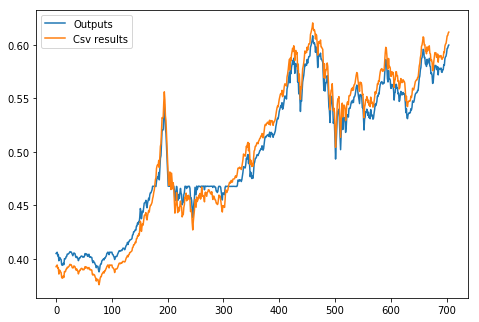

In [41]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot(np.array(output_lists),label="Outputs")
#ax.plot(np.array(error_list),label="Errors")
ax.plot(np.array(final_y_s),label="Csv results")
ax.legend()
plt.show()